# Sentence Correction using Recurrent Neural Network

1.Social media text messages contains short form of english text and it leads to machine learning models to predict the wrong english sentences.

2.This case study helps in converting the social media text message into proper english text messages

#### SOURCE Data Description

1. Source Data Link http://www.comp.nus.edu.sg/~nlp/sw/sm_norm_mt.tar.gz

2. SourceFile Size:413KB

3. Description of the SourceData.This source file contains three types of data
        
        1.Social Media Text messages
        
        2.Chinese messages
        
        3.Original English Text
        
        
4. Number of rows present in source data: 2000        
        

### Machine Learning Probelm

1. In this case study i am implementing research paper on sentence correction using RNN's
      Link:https://cs224d.stanford.edu/reports/Lewis.pdf
      
2. Using Encoder and Decoder Sequence to Sequenc network with LSTM which are types of RNN's 

3. Loss function : categorical_crossentropy
      

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Input,GRU
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 1. **Extracting the Data**




In [ ]:
file = open("/content/drive/MyDrive/CaseStudy2/en2cn-2k.en2nen2cn",'r',encoding = 'utf-8')

In [ ]:
File_Lines=[]
with open("/content/drive/MyDrive/CaseStudy2/en2cn-2k.en2nen2cn") as fp:
    Lines = fp.readlines()
    File_Lines=Lines

In [ ]:
# In this piece of code,looping through the source file and extracting the normalized text and english text
Original_English_Text=[]
Normalized_Text=[]
Chinese_Text=[]
Normalized_count=0
English_count=1
Chinese_count=2
for i in range(len(File_Lines)):
    if (Normalized_count==len(File_Lines)):
        break
    else:  
        Normalized_Text.append(File_Lines[Normalized_count])
        Original_English_Text.append(File_Lines[English_count])
        Chinese_Text.append(File_Lines[Chinese_count])
        Normalized_count=Normalized_count+3
        English_count=English_count+3
        Chinese_count=Chinese_count+3

In [ ]:
print(len(Original_English_Text))
print(len(Normalized_Text))
print(len(Chinese_Text))

2000
2000
2000


In [ ]:
print(Original_English_Text[5])
print(Normalized_Text[5])

Haha. Okay. Are you going to mail her? Or do you want me to reply?

Haha... Okay... You going to mail her? Or you want me to reply...



In [ ]:
Data={"NormalizedText":Normalized_Text,"Original_English_Text":Original_English_Text}

In [ ]:
import pandas as pd
SourceData=pd.DataFrame(Data)


In [ ]:
print(SourceData.head(5))

                                      NormalizedText                              Original_English_Text
0                  U wan me to "chop" seat 4 u nt?\n   Do you want me to reserve seat for you or not?\n
1  Yup. U reaching. We order some durian pastry a...  Yeap. You reaching? We ordered some Durian pas...
2  They become more ex oredi... Mine is like 25.....  They become more expensive already. Mine is li...
3                          I'm thai. what do u do?\n                        I'm Thai. What do you do?\n
4  Hi! How did your week go? Haven heard from you...  Hi! How did your week go? Haven't heard from y...


In [ ]:
pd.to_pickle(SourceData, "/content/drive/MyDrive/CaseStudy2/SourceData.pkl")

# **2.Exploratory Data Analysis**

In [ ]:
# Reading the Source File
import pandas as pd
Data=pd.read_pickle(r"/content/drive/MyDrive/CaseStudy2/SourceData.pkl")

In [ ]:
Data.head(5)

,NormalizedText,Original_English_Text
0,"U wan me to ""chop"" seat 4 u nt?\n",Do you want me to reserve seat for you or not?\n
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?\n,I'm Thai. What do you do?\n
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


In [ ]:
#Checking for Null Values
Data.isnull().sum()

NormalizedText           0
Original_English_Text    0
dtype: int64

In [ ]:
#Checking Duplicates
Data.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
#Maximum length in words
Max_Length_Normalized_Text = Data['NormalizedText'].str.split().str.len().max()
print("The maximum length in words for NormalizedText: " +  str(Max_Length_Normalized_Text)) 

Max_Length_Original_English_Text = Data['Original_English_Text'].str.split().str.len().max()
print("The maximum length in words for Original English Text : " +  str(Max_Length_Original_English_Text)) 

The maximum length in words for NormalizedText: 49
The maximum length in words for Original English Text : 59


In [ ]:
#Minimum length in words

Min_Length_Normalized_Text = Data['NormalizedText'].str.split().str.len().min()
print("The minimum length in words for NormalizedText before preprocessing: " +  str(Min_Length_Normalized_Text)) 

Min_Length_Original_English_Text = Data['Original_English_Text'].str.split().str.len().min()
print("The minimum length in words for Original English Text before preprocessing: " +  str(Min_Length_Original_English_Text)) 


The minimum length in words for NormalizedText before preprocessing: 1
The minimum length in words for Original English Text before preprocessing: 1


**Plotting word Cloud to check Frequent Words**

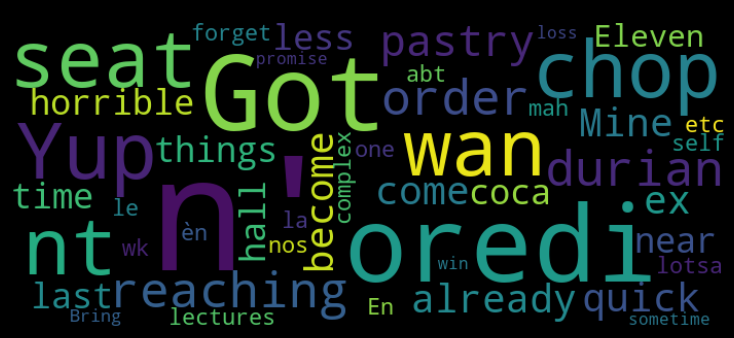

In [ ]:
#Word cloud on NormalizedTextMessages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = Data.NormalizedText.values
wordcloud = WordCloud(
    width = 700,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Normalized Text WordCloud")
plt.show()

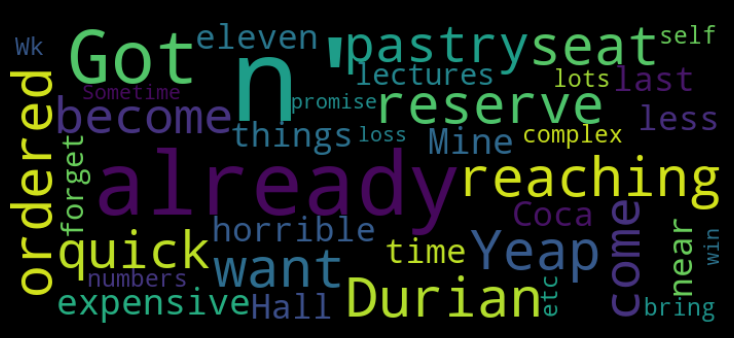

In [ ]:
#WordCloud on Original English Text
text = Data.Original_English_Text.values
wordcloud = WordCloud(
    width = 700,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Englisg Text WordCloud")
plt.show()

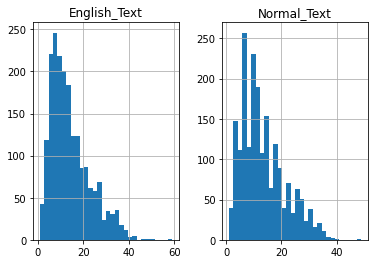

In [ ]:
# empty lists
English_Text = []
Normal_text = []

# Plotting graphs to check spreading of most of the sentences with length
for i in Data.Original_English_Text.values:
      English_Text.append(len(i.split()))

for i in Data.NormalizedText.values:
      Normal_text.append(len(i.split()))

length_df = pd.DataFrame({'English_Text':English_Text, 'Normal_Text':Normal_text})
length_df.hist(bins = 30)
plt.show()

Observations:

1.From the above plot shows the most of the sentences in both Normal text and English_text with number of words lies between greater than 0 and less than 40

# **3.Data Augmentation**

In [ ]:
pip install nlpaug

     |████████████████████████████████| 399kB 12.0MB/s 


In [ ]:
from nlpaug.util.file.download import DownloadUtil
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.')

In [ ]:
Original_English_Text_Aug=list(Data.Original_English_Text.values)
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
Normalized_Text_Aug1=[]
Normalized_Text_Aug2=[]
#aug = naw.SpellingAug()
aug = naw.WordEmbsAug(
    model_type='fasttext', model_path='/content/wiki-news-300d-1M.vec',
    action="insert")
aug_syn = naw.SynonymAug(aug_src='wordnet')
#aug_ocr = nac.OcrAug()
for text in Original_English_Text_Aug:
  augmented_text = aug.augment(text)
  Normalized_Text_Aug1.append(augmented_text)
  augmented_syn = aug_syn.augment(text)
  Normalized_Text_Aug2.append(augmented_syn)

In [ ]:
FastText_Augmented_Data=pd.DataFrame(list(zip(Normalized_Text_Aug1,Original_English_Text_Aug)),columns=['NormalizedText','Original_English_Text'])
Syn_Augmented_Data=pd.DataFrame(list(zip(Normalized_Text_Aug2,Original_English_Text_Aug)),columns=['NormalizedText','Original_English_Text'])

In [ ]:
from sklearn.utils import shuffle
DataFramesList=[Data,FastText_Augmented_Data,Syn_Augmented_Data]
Data=pd.concat(DataFramesList)
Data = shuffle(Data)
pd.to_pickle(Data, "/content/drive/MyDrive/CaseStudy2/AugmentedData.pkl")
print(len(Data))

6000


In [ ]:
#Loading Augmented Data
Data=pd.read_pickle(r"/content/drive/MyDrive/CaseStudy2/AugmentedData.pkl")

# **4.Preprocessing**

In [ ]:
import re
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    phrase = re.sub(r"haha"," ",phrase)
    phrase = re.sub(r"hehe"," ",phrase)

    return phrase

In [ ]:
def preprocess(text):
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = re.sub('[0-9]','',text)
    return text

In [ ]:
Data['Original_English_Text'] = Data['Original_English_Text'].apply(preprocess)
Data['NormalizedText'] = Data['NormalizedText'].apply(preprocess)

In [ ]:
Data.head(5)

,NormalizedText,Original_English_Text
1923,so how are you spending your sunday,so how are you spending your sunday
410,pic ok kre i m treadle at city link already,ok i am at city link already
1452,joey be you from india,joey are you from india
691,watch jz married leihh,watch just married
464,oh tomorrow ve got driving object lesson can...,oh tomorrow i have got driving lesson can not ...


# **5.Transforming Data for DeepLearning Models**

In [ ]:
Data['Original_English_Text_inp'] = '<start> ' + Data['Original_English_Text'].astype(str)
Data['Original_English_Text_out'] = Data['Original_English_Text'].astype(str) + ' <end>'
Data.head()

,NormalizedText,Original_English_Text,Original_English_Text_inp,Original_English_Text_out
1923,so how are you spending your sunday,so how are you spending your sunday,<start> so how are you spending your sunday,so how are you spending your sunday <end>
410,pic ok kre i m treadle at city link already,ok i am at city link already,<start> ok i am at city link already,ok i am at city link already <end>
1452,joey be you from india,joey are you from india,<start> joey are you from india,joey are you from india <end>
691,watch jz married leihh,watch just married,<start> watch just married,watch just married <end>
464,oh tomorrow ve got driving object lesson can...,oh tomorrow i have got driving lesson can not ...,<start> oh tomorrow i have got driving lesson ...,oh tomorrow i have got driving lesson can not ...


In [ ]:
Data = Data.drop(['Original_English_Text'], axis=1)

In [ ]:
#Splitting data into train,test and validation sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.2) 
train,validation=train_test_split(train, test_size=0.075)
print(len(train))
print(len(test))
print(len(validation))

4440
1200
360


Applying padding and Tokenization

In [ ]:
tknizer_english = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',char_level=False)
tknizer_english.fit_on_texts(train['Original_English_Text_inp'].values)
tknizer_normal_text = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',char_level=False)
tknizer_normal_text.fit_on_texts(train['NormalizedText'].values)

In [ ]:
encoder_vcab=tknizer_normal_text.word_index
decoder_vcab=tknizer_english.word_index

In [ ]:
print("Encoder Vocabulary",encoder_vcab)
print("Decoder Vocabulary",decoder_vcab)

Encoder Vocabulary {'i': 1, 'you': 2, 'to': 3, 'the': 4, 'at': 5, 'is': 6, 'a': 7, 'u': 8, 'me': 9, 'my': 10, 'are': 11, 'for': 12, 'and': 13, 'can': 14, 'so': 15, 'it': 16, 'go': 17, 't': 18, 'then': 19, 'in': 20, 'not': 21, 'hey': 22, 'your': 23, 'of': 24, 'be': 25, 'ok': 26, 'on': 27, 's': 28, 'have': 29, 'how': 30, 'what': 31, 'we': 32, 'do': 33, 'that': 34, 'm': 35, 'got': 36, 'am': 37, 'or': 38, 'now': 39, 'time': 40, 'but': 41, 'will': 42, 'don': 43, 'going': 44, 'no': 45, 'one': 46, 'want': 47, 'if': 48, 'with': 49, 'just': 50, 'see': 51, 'already': 52, 'know': 53, 'up': 54, 'all': 55, 'hi': 56, 'think': 57, 'out': 58, 'meet': 59, 'tomorrow': 60, 'get': 61, 'there': 62, 'come': 63, 'where': 64, 'yes': 65, 'today': 66, 'when': 67, 'still': 68, 'like': 69, 'call': 70, 'good': 71, 'she': 72, 'e': 73, 'okay': 74, 'take': 75, 'from': 76, 'too': 77, 'home': 78, 'this': 79, 'ask': 80, 'll': 81, 'need': 82, 'number': 83, 'oh': 84, 'day': 85, 'back': 86, 'they': 87, 'also': 88, 'only': 

In [ ]:
vocab_size_eng=len(tknizer_english.word_index.keys())
print(vocab_size_eng)
vocab_size_normal_text=len(tknizer_normal_text.word_index.keys())
print(vocab_size_normal_text)

2824
11896


Creating Embedding matrix for both encoder and decoder Model

In [ ]:
embeddings_index = dict()
Decoder_embedding_index=dict()
f = open('/content/wiki-news-300d-1M.vec')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

Encoder_embedding_matrix = np.zeros((len(encoder_vcab)+1, 300))
for word, i in encoder_vcab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        Encoder_embedding_matrix[i] = embedding_vector

Decoder_embedding_matrix = np.zeros((len(decoder_vcab)+1, 300))
for word, i in decoder_vcab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        Decoder_embedding_matrix[i] = embedding_vector       

In [ ]:
print(Encoder_embedding_matrix.shape)
print(Decoder_embedding_matrix.shape)

(11897, 300)
(2825, 300)


Defining Generator Class

In [ ]:
class Dataset:
    def __init__(self, Data, tknizer_english, tknizer_normal_text, max_len):
        self.encoder_inps = Data['NormalizedText'].values
        self.decoder_inps = Data['Original_English_Text_inp'].values
        self.decoder_outs = Data['Original_English_Text_out'].values
        self.tknizer_eng = tknizer_english
        self.tknizer_nor= tknizer_normal_text
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_nor.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_eng.texts_to_sequences([self.decoder_outs[i]])
        

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])
        

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
train_dataset = Dataset(train, tknizer_english, tknizer_normal_text, 50)
test_dataset  = Dataset(test, tknizer_english, tknizer_normal_text, 50)
Validation_dataset= Dataset(validation, tknizer_english, tknizer_normal_text, 50)

train_dataloader = Dataloder(train_dataset, batch_size=50)
test_dataloader = Dataloder(test_dataset, batch_size=50)
validation_dataloader=Dataloder(Validation_dataset, batch_size=50) 

In [ ]:
print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)
print(test_dataloader[0][0][0].shape)

(50, 50) (50, 50) (50, 50)
(50, 50)


# **6.Deep learning Models**

1.Encoder and Decoder with GRU

2.Encoder and Decoder Model with LSTM

3.Encoder and Decoder Model with attention Mechanisam

### **1.Encoder and Decoder with GRU**

In [ ]:
encoder_inputs = Input(shape=(None,),name="EncoderInput")

enc_emb =  Embedding(vocab_size_normal_text+1,300, mask_zero = True,name="EncoderEmbeddingLayer",weights=[Encoder_embedding_matrix])(encoder_inputs)
encoder_GRU = GRU(300, return_state=True,name="EncoderGRU")
encoder_outputs,state_h= encoder_GRU(enc_emb)
#storing encoder states
encoder_states =state_h
 
# Set up the decoder, using encoder_states as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vocab_size_eng+1,300,mask_zero = True,name="DecoderEmbeddingLayer",weights=[Decoder_embedding_matrix])
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_gru = GRU(300, return_sequences=True, return_state=True,name="DecoderGRU")
decoder_outputs, _= decoder_gru(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_eng, activation="softmax",name="DenseLayer")
decoder_outputs = decoder_dense(decoder_outputs)
 
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
EncoderInput (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
EncoderEmbeddingLayer (Embeddin (None, None, 300)    3569100     EncoderInput[0][0]               
__________________________________________________________________________________________________
DecoderEmbeddingLayer (Embeddin (None, None, 300)    847500      input_6[0][0]                    
____________________________________________________________________________________________

In [ ]:
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping,TerminateOnNaN,TensorBoard
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1)
filepath="/content/drive/MyDrive/CaseStudy2/Model-1/weights-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc',  verbose=4, save_best_only=True, mode='auto')
logdir = "/content/drive/MyDrive/CaseStudy2/Model-1/Logs/fit_model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

train_summary_writer = tf.summary.create_file_writer(logdir)
tensorboard_callback = TensorBoard(log_dir=logdir,histogram_freq=1,profile_batch = 100000000)
callback_list = [checkpoint,tensorboard_callback]

In [ ]:
#Compiling the Model with Adam as optimizer and categorical cross entropy as loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
train_steps=train.shape[0]//100
valid_steps=validation.shape[0]//100

Model_Output=model.fit_generator(train_dataloader,steps_per_epoch=train_steps,epochs=200, validation_data=test_dataloader, validation_steps=valid_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
44/44 [==============================] - 17s 205ms/step - loss: nan - acc: 0.0665 - val_loss: nan - val_acc: 0.0681
Epoch 2/200
44/44 [==============================] - 6s 133ms/step - loss: nan - acc: 0.0647 - val_loss: nan - val_acc: 0.0681
Epoch 3/200
44/44 [==============================] - 6s 132ms/step - loss: nan - acc: 0.0645 - val_loss: nan - val_acc: 0.0681
Epoch 4/200
44/44 [==============================] - 6s 134ms/step - loss: nan - acc: 0.0639 - val_loss: nan - val_acc: 0.0681
Epoch 5/200
44/44 [==============================] - 6s 133ms/step - loss: nan - acc: 0.0640 - val_loss: nan - val_acc: 0.0681
Epoch 6/200
44/44 [==============================] - 6s 127ms/step - loss: nan - acc: 0.0661 - val_loss: nan - val_acc: 0.0681
Epoch 7/200
44/44 [==============================] - 6s 132ms/step - loss: nan - acc: 0.0643 - val_loss: nan - val_acc: 0.0681
Epoch 8/200
44/44 [==============================] - 6s 132ms/step - loss: nan - acc: 0.0646 - val_loss: nan -

**Results Table**

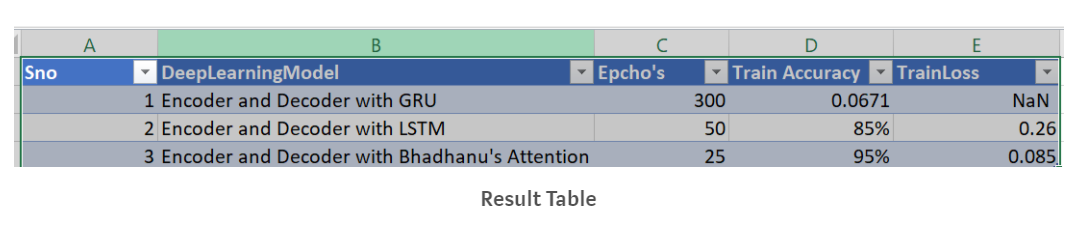

### Steps Performed:

1.Extracted scoial media text data(normal text data) and original english data from the given source file

2.Used data agumentation using NLPAUG library and used two types of augmentation methods 1.Synonym Agumentation and 2.FastText agumentation for the words and generated nearly 4000 data points which then concatenated with source data points and overall data set size is 6000 points.

3.Preprocessed data using re module and removed all puntuation marks and other special symbols.

4.Created embedding weights using fastext model and used this weights in enbedding layer in neural network

5. Using Data generators trained encoder and decoder model and get the train accuracy 85% and test accuracy 60%

6. Trained one more neural network model using Bhendu attention mechanisam and it gives 95% train accuracy and 75% test accuracy.

7. The Average Blue score of the neural network using beam search is 68% and it is pretty good